이미지 인식의 꽃, 컨볼루션 신경망(CNN)

1. 이미지를 인식하는 원리

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [2]:
import matplotlib.pyplot as plt
import sys

In [3]:
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장함
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
# 학습셋과 테스트셋이 각각 몇 개의 이미지로 되어 있는지 확인
print("학습셋 이미지 수: %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수: %d 개" % (X_test.shape[0]))

학습셋 이미지 수: 60000 개
테스트셋 이미지 수: 10000 개


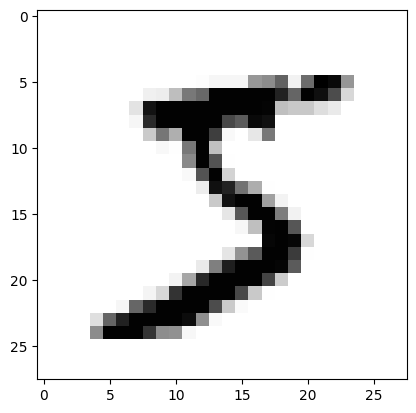

In [5]:
# 첫번째 이미지 확인
plt.imshow(X_train[0], cmap='Greys')
plt.show()

In [6]:
# 이미지가 인식되는 원리
for x in X_train[0]:
  for i in x:
    sys.stdout.write("%-3s" % i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [7]:
# 차원 변환 과정 실습
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float64')
X_train = X_train / 255

In [8]:
# 클래스 값 확인
print("class: %d " % (y_train[0]))

class: 5 


In [9]:
# 바이너리화 과정(원-핫 인코)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


2. 딥러닝 기본 프레임 만들기

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
import pandas as pd

In [11]:
# MNIST 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [12]:
# 차원 변환 후, 테스트셋과 학습셋으로 나누기
X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

y_train = to_categorical(y_train, 10)  # 원-핫 인코딩
y_test = to_categorical(y_test, 10)  # num_classes= 10: MNIST 데이터셋에 총 10개의 클래스(숫자 0부터 9까지)가 있음을 의미

In [13]:
# 모델 구조 설정 (다층 퍼셉트론)
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 다중 클래스 분류를 위해 출력 확률 분포를 계산
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [14]:
# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 최적화를 위한 설정 구간
modelpath = "./MNIST_MLP.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [16]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.19396, saving model to ./MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.19396 to 0.14237, saving model to ./MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.14237 to 0.11339, saving model to ./MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11339 to 0.09858, saving model to ./MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09858 to 0.09405, saving model to ./MNIST_MLP.hdf5

Epoch 6: val_loss improved from 0.09405 to 0.08981, saving model to ./MNIST_MLP.hdf5

Epoch 7: val_loss improved from 0.08981 to 0.08512, saving model to ./MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08512

Epoch 9: val_loss did not improve from 0.08512

Epoch 10: val_loss improved from 0.08512 to 0.08064, saving model to ./MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.08064

Epoch 12: val_loss did not improve from 0.08064

Epoch 13: val_loss did not improve from 0.08064

Epoch 14: val_loss improved from 0.08064 to 0.08033, saving model to ./

In [17]:
# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(X_test, y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0727 - accuracy: 0.9820

 Test Accuracy: 0.9820


In [18]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

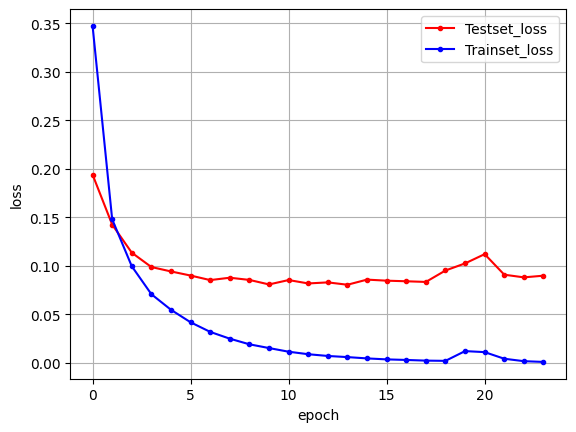

In [19]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

loss가 어느 순간부터 안내려감 -> 중간에 중단

5. 컨볼루션 신경망 실행

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [21]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [23]:
# 모델 실행 옵션 설정
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
# 모델 최적화를 위한 설정 구간
modelpath = "./MNIST_CNN.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [25]:
# 모델 실행
history = model.fit(X_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.07641, saving model to ./MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.07641 to 0.05858, saving model to ./MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05858 to 0.05237, saving model to ./MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05237 to 0.04644, saving model to ./MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04644 to 0.04642, saving model to ./MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.04642 to 0.04212, saving model to ./MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.04212 to 0.04087, saving model to ./MNIST_CNN.hdf5

Epoch 8: val_loss did not improve from 0.04087

Epoch 9: val_loss improved from 0.04087 to 0.03853, saving model to ./MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03853

Epoch 11: val_loss did not improve from 0.03853

Epoch 12: val_loss did not improve from 0.03853

Epoch 13: val_loss did not improve from 0.03853

Epoch 14: val_loss did not improve from 0.03853

Epoch 15: val_loss did

In [26]:
# 검증셋과 학습셋의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

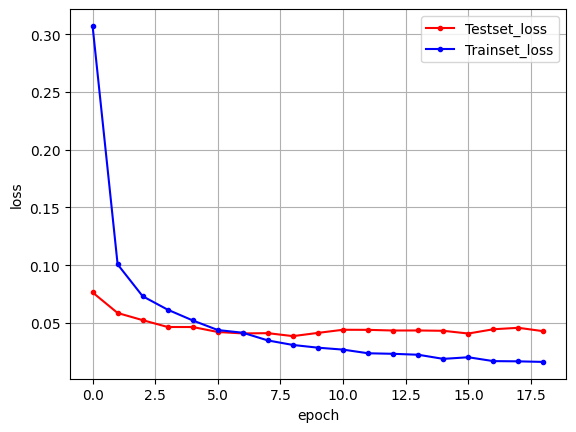

In [27]:
# 그래프로 표현
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

# 그래프에 그리드, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()